In [213]:
import pandas as pd

# Read the two CSV files into pandas DataFrames
df1 = pd.read_csv('E:/DataScienceInternship/Project/book Recomendation data/Ratings.csv')
df2 = pd.read_csv('E:/DataScienceInternship/Project/book Recomendation data/Users.csv')

# Merge the DataFrames on the common column (User-ID) using an outer join
merged_df = pd.merge(df1, df2, on='UserID', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('E:/DataScienceInternship/Project/book Recomendation data/RatingandUsersIn.csv', index=False)


In [215]:
import pandas as pd

# Read the two CSV files into pandas DataFrames
df1 = pd.read_csv('E:/DataScienceInternship/Project/book Recomendation data/RatingandUsersIn.csv')
df2 = pd.read_csv('E:/DataScienceInternship/Project/book Recomendation data/Books.csv')

merged_df = pd.merge(df1, df2, on='ISBN', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('E:/DataScienceInternship/Project/book Recomendation data/RatingandUsersandBooksIn.csv', index=False)

In [5]:
import os
import re
import nltk
import requests
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
from PIL import UnidentifiedImageError
warnings.filterwarnings('ignore')

from io import BytesIO

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
books = pd.read_csv('E:/DataScienceInternship/Project/book Recomendation data/RatingandUsersandBooksIn.csv',)
books.head()

,UserID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [7]:
df = books.copy()
df.head()


,UserID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [86]:
def item_based_recommender(book_title):
    book_title = str(book_title)
    if book_title in df['Book-Title'].values:
        book_info = df[df['Book-Title'] == book_title].iloc[0]
        author1 = book_info['Book-Author']
        rating1 = round(df[df['Book-Title'] == book_title]['Book-Rating'].mean(), 1)
        print('Author:',author1)
        print('Rating:',rating1)
        print('\n')
        rating_counts = pd.DataFrame(df['Book-Title'].value_counts())
        rare_books = rating_counts[rating_counts['Book-Title'] <= 50].index
        common_books = df[~df['Book-Title'].isin(rare_books)]
        #print(common_books)
        
        if book_title in rare_books:
            random = pd.Series(common_books['Book-Title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try:\n')
            print(random[0],'\n')
            print(random[1],'\n')
        else:
            user_book_df = common_books.pivot_table(index=['UserID'], columns=['Book-Title'], values='Book-Rating')
            #print(user_book_df)

            # Get ratings for the given book
            book_ratings = user_book_df[book_title]
            #print(book_ratings.head(1580))

            # Calculate correlations with other books
            if len(user_book_df.columns) > 0:
                recom_data = pd.DataFrame(user_book_df.corrwith(book_ratings, axis=0), columns=['Correlation'])
                recom_data.dropna(inplace=True)  # Remove NaN values
                #print(recom_data)
                recom_data = recom_data.join(df['Book-Rating'].groupby(df['Book-Title']).mean())  # Join average ratings
                #print(recom_data)

                # Filter out the input book and low-rated books
                recom_data = recom_data[(recom_data['Book-Rating'] >= 4) & (recom_data.index != book_title)]

                # Sort by correlation and average rating
                recom_data = recom_data.sort_values(by=['Correlation', 'Book-Rating'], ascending=False).head(5)

                # Display recommended books
                if not recom_data.empty:
                    print("Recommended books based on", book_title)
                    print(recom_data[['Correlation', 'Book-Rating']])

                    # Fetching and displaying images
                    fig, axs = plt.subplots(1, len(recom_data), figsize=(18, 5))
                    fig.suptitle(f"Recommended books based on '{book_title}'", size=22)
                    session = requests.Session()
                    # Set a custom User-Agent header
                    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

                    for i, (recommended_book, corr) in enumerate(recom_data.iterrows()):
                        url = common_books.loc[common_books['Book-Title'] == recommended_book, 'Image-URL-L'].iloc[0]
                        response = session.get(url, headers=headers)
                        if response.status_code == 200:
                            try:
                                im = Image.open(BytesIO(response.content))
                                axs[i].imshow(im)
                                axs[i].axis("off")
                                axs[i].set_title(f"Rating: {corr['Book-Rating']:.1f}, Correlation: {corr['Correlation']:.2f}", y=-0.2, fontsize=14)
                            except Exception as e:
                                print("An error occurred while opening the image from URL:", url)
                        else:
                            print(f"Failed to fetch image from URL: {url}")
                    plt.show()
                else:
                    print("No recommendations available.")
            else:
                print("No books found in the dataset.")
    else:
        print('Cannot find the book in the dataset. Please check the spelling.')


In [87]:
item_based_recommender('Divine Secrets of the Ya-Ya Sisterhood: A Novel')

Author: Rebecca Wells
Rating: 2.0


There are no recommendations for this book
Try:

After the Fire 

Corelli's Mandolin : A Novel 



Author: James Finn Garner
Rating: 3.6


Recommended books based on Politically Correct Bedtime Stories: Modern Tales for Our Life and Times
                                                    Correlation  Book-Rating
Book-Title                                                                  
Girl With a Pearl Earring                              1.000000     4.266667
The Death of Vishnu: A Novel                           1.000000     4.152542
Chicken Soup for the Pet Lover's Soul (Chicken ...     0.983124     4.011111
About a Boy                                            0.864772     4.047297
Speak                                                  0.640933     4.818182


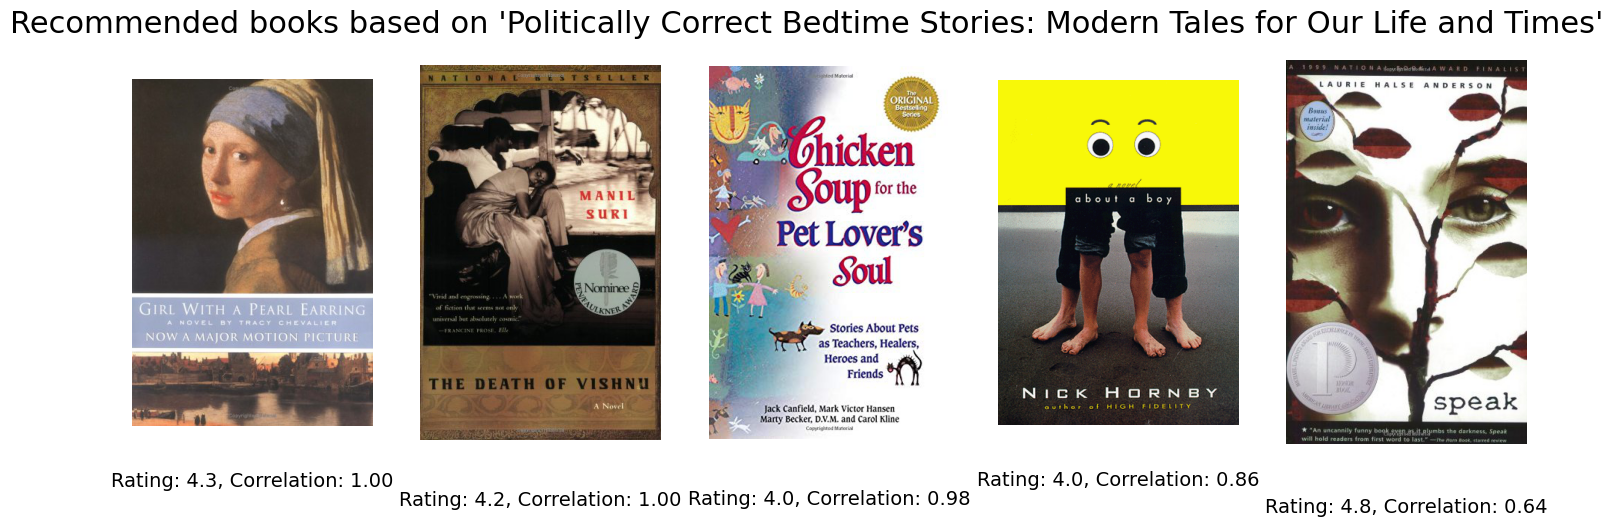

In [88]:
item_based_recommender('Politically Correct Bedtime Stories: Modern Tales for Our Life and Times')

Author: Nick Hornby
Rating: 4.0


Recommended books based on High Fidelity
                                                    Correlation  Book-Rating
Book-Title                                                                  
The Curious Incident of the Dog in the Night-Ti...     1.000000     4.851852
Interpreter of Maladies                                0.676753     5.000000
About a Boy                                            0.661451     4.047297
The World According to Garp                            0.571944     4.200000
A Child Called \It\": One Child's Courage to Su...     0.562500     4.032129


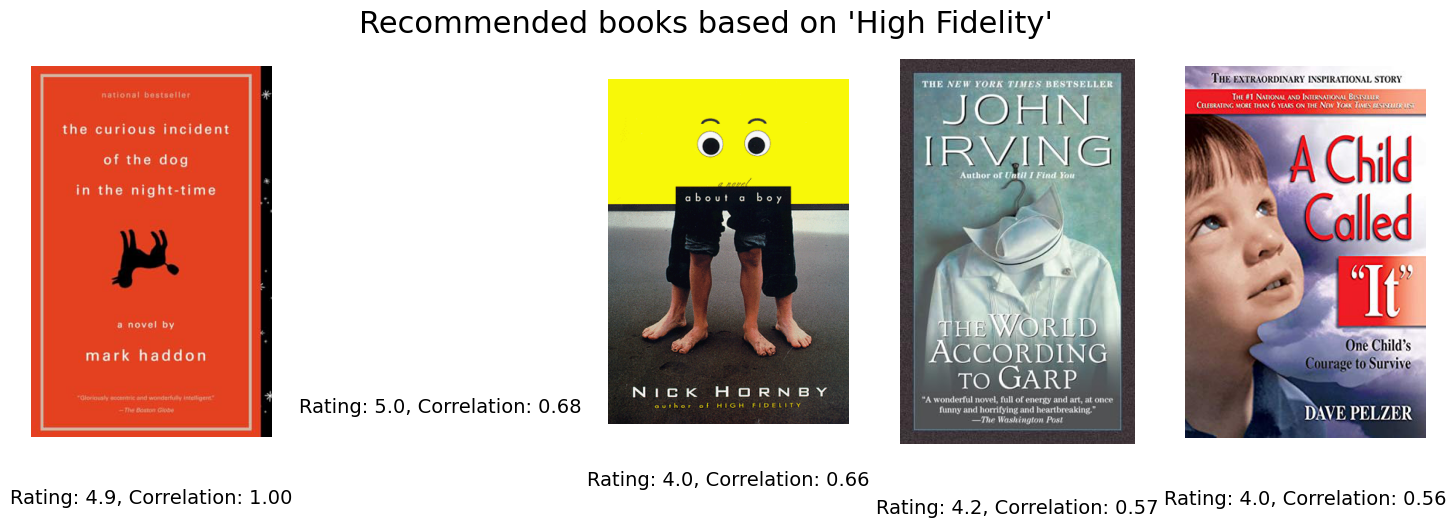

In [69]:
item_based_recommender("High Fidelity")

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommender(book_title):
    
    book_title = str(book_title)
    if book_title in df['Book-Title'].values:
        book_info = df[df['Book-Title'] == book_title].iloc[0]
        author1 = book_info['Book-Author']
        rating1 = round(df[df['Book-Title'] == book_title]['Book-Rating'].mean(), 1)
        print('Author:',author1)
        print('Rating:',rating1)
        print('\n')
        rating_counts = pd.DataFrame(df['Book-Title'].value_counts())
        rare_books = rating_counts[rating_counts['Book-Title'] <= 50].index
        common_books = df[~df['Book-Title'].isin(rare_books)]
        
        if book_title in rare_books:
            random = pd.Series(common_books['Book-Title'].unique()).sample(2).values
            print('There are no recommendations for this book')
            print('Try: \n')
            print('{}'.format(random[0]),'\n')
            print('{}'.format(random[1]),'\n')
        
        else:
            common_books = common_books.drop_duplicates(subset=['Book-Title'])
            common_books.reset_index(inplace=True, drop=True)
            common_books['index'] = common_books.index
            
            target_cols = ['Book-Title', 'Book-Author', 'Publisher']
            common_books[target_cols] = common_books[target_cols].astype(str)
            common_books['combined_features'] = [' '.join(common_books[target_cols].iloc[i,].values) for i in range(common_books[target_cols].shape[0])]
            
            cv = CountVectorizer()
            count_matrix = cv.fit_transform(common_books['combined_features'])
            cosine_sim = cosine_similarity(count_matrix)
            
            index = common_books[common_books['Book-Title'] == book_title].index[0]
            sim_books = list(enumerate(cosine_sim[index]))
            sorted_sim_books = sorted(sim_books, key=lambda x: x[1], reverse=True)[1:6]
            
            # Plotting
            fig, axs = plt.subplots(1, 5, figsize=(18, 5))
            fig.suptitle(f"Recommended books based on '{book_title}'", size=22)
            session = requests.Session()

            headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

            for i, (sim_index, similarity_score) in enumerate(sorted_sim_books):
                book_info = common_books.iloc[sim_index]
                book_title = book_info['Book-Title']
                author = book_info['Book-Author']
                publisher = book_info['Publisher']
                
                rating = round(df[df['Book-Title'] == book_title]['Book-Rating'].mean(), 1)
                url = common_books.loc[common_books['Book-Title'] == book_title, 'Image-URL-L'].iloc[0]

                response = session.get(url, headers=headers)
                if response.status_code == 200:
                    try:
                        im = Image.open(BytesIO(response.content))
                        axs[i].imshow(im)
                        axs[i].axis("off")
                        # Set title with author and publisher if available
                        axs[i].set_title(f"{'Author: ' + author if author else ''}\n{'Publisher: ' + publisher if publisher else ''}\nRating: {rating}",y=-0.4, fontsize=14)
                    except Exception as e:
                        print("An error occurred while opening the image from URL:", url)
                else:
                    print("Failed to fetch image from URL:", url)

            plt.show()
    else:
        print('Cannot find the book in the dataset. Please check the spelling.')


In [71]:
content_based_recommender('Divine Secrets of the Ya-Ya Sisterhood: A Novel')

Author: Rebecca Wells
Rating: 2.0


There are no recommendations for this book
Try: 

The Prayer of Jabez: Breaking Through to the Blessed Life 

The Piano Tuner : A Novel 



Author: James Finn Garner
Rating: 3.6




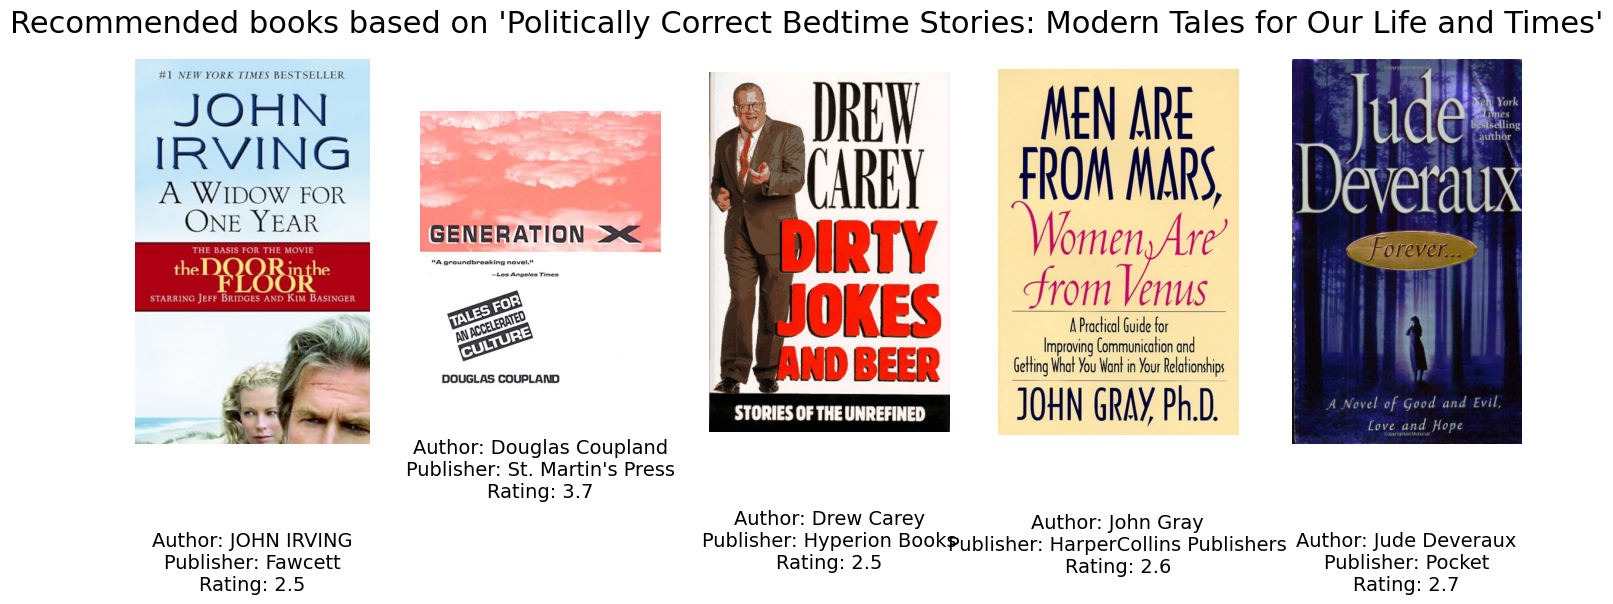

In [72]:
content_based_recommender('Politically Correct Bedtime Stories: Modern Tales for Our Life and Times')

Author: J. K. Rowling
Rating: 5.6




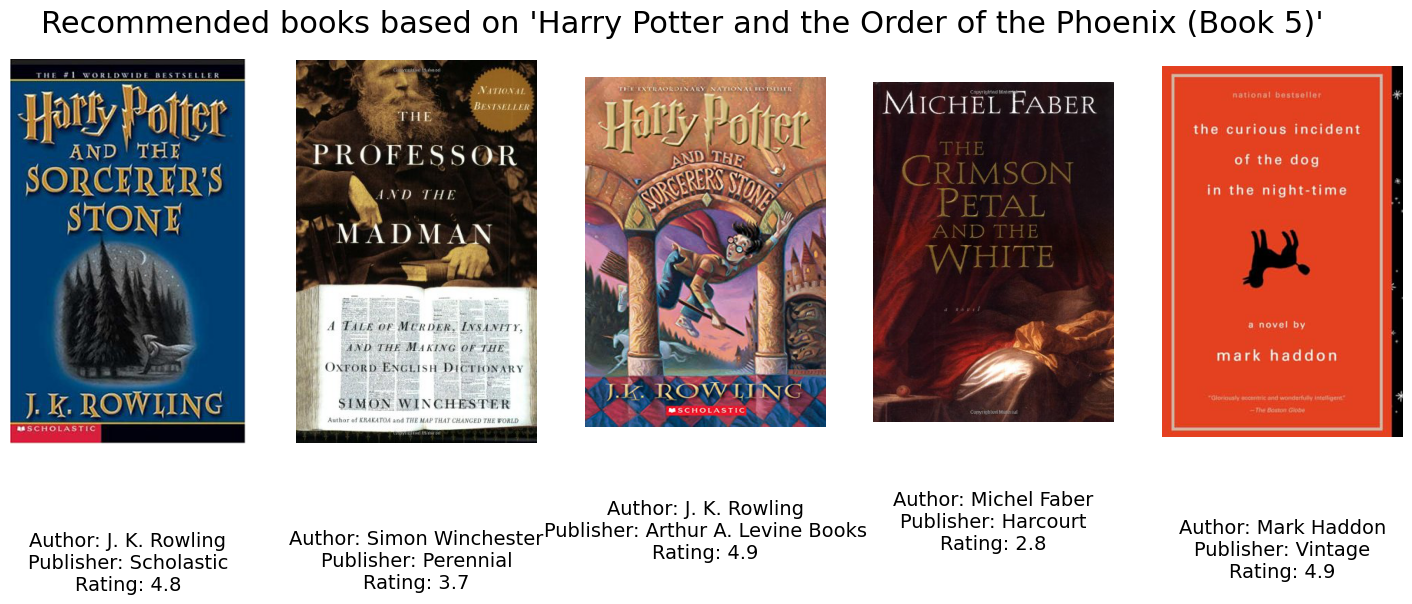

In [73]:
content_based_recommender('Harry Potter and the Order of the Phoenix (Book 5)')